In [1]:
import pandas as pd

# Re-load the datasets after code state reset
fake_df = pd.read_csv("D:\ML PROJECTS\Fake news detection\Fake.csv")
true_df = pd.read_csv("D:\ML PROJECTS\Fake news detection\True.csv")

# Add labels: 1 = Fake, 0 = Real
fake_df["label"] = 1
true_df["label"] = 0

# Combine datasets
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

# Check structure and distribution
combined_df.info(), combined_df["label"].value_counts(), combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


(None,
 label
 1    23481
 0    21417
 Name: count, dtype: int64,
                                                title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  label  
 0  December 31, 2017      1  
 1  December 31, 2017      1  
 2  December 30, 2017      1  
 3  December 29, 2017      1  
 4  December 25, 2017      1  )

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pickle

# Step 1: Use only 'text' and 'label' columns
X = combined_df['text']
y = combined_df['label']

In [3]:
# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [5]:
# Step 4: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [6]:
# Step 5: Predict and evaluate
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [8]:
import pickle

# Save model
with open("D:/ML PROJECTS/Fake news detection/fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open("D:/ML PROJECTS/Fake news detection/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


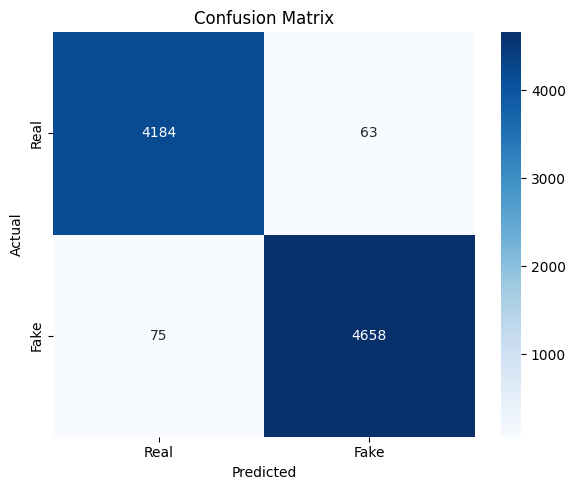

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("D:/ML PROJECTS/Fake news detection/fake_news_confusion_matrix.png")
plt.show()


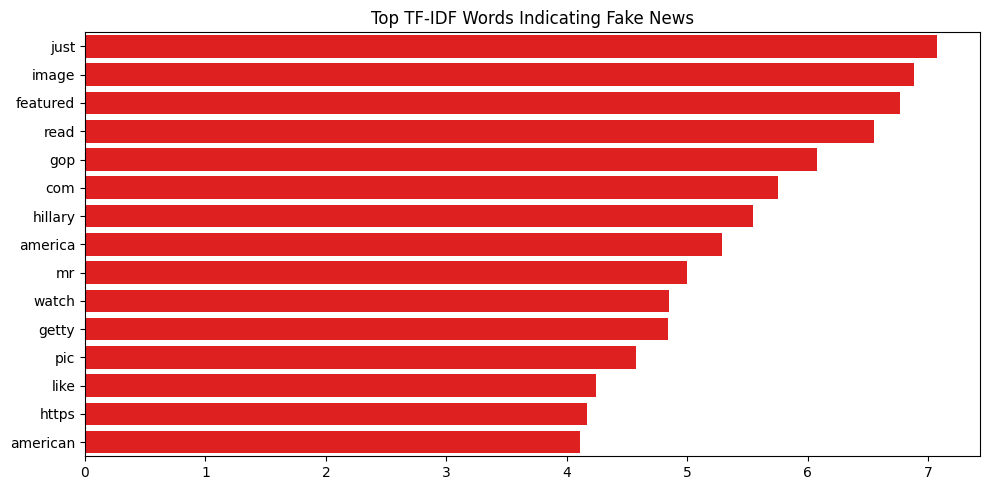

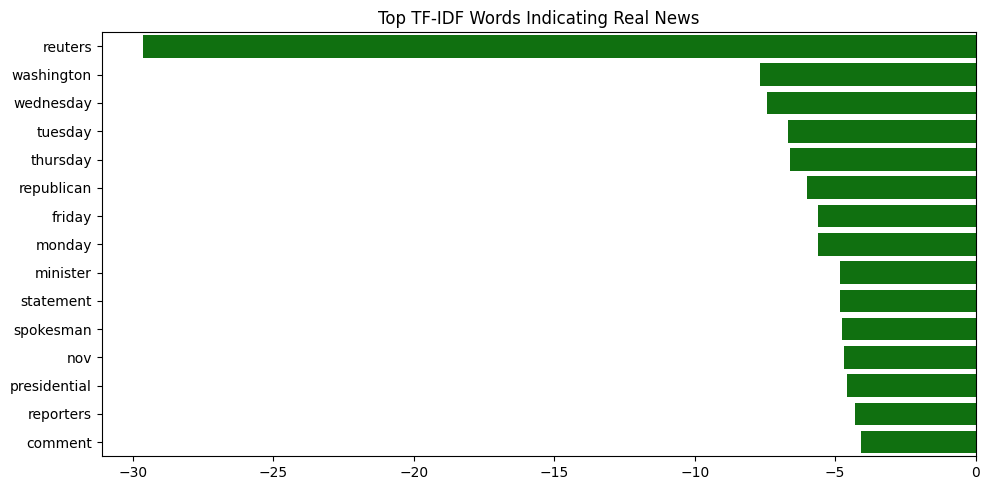

In [10]:
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Top indicators for Fake news
topn = 15
top_fake = sorted(zip(coefs, feature_names), reverse=True)[:topn]
top_real = sorted(zip(coefs, feature_names))[:topn]

# Plot Fake indicators
fake_words = [w for c, w in top_fake]
fake_values = [c for c, w in top_fake]
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_values, y=fake_words, color="red")
plt.title("Top TF-IDF Words Indicating Fake News")
plt.tight_layout()
plt.savefig("D:/ML PROJECTS/Fake news detection/top_fake_words.png")
plt.show()

# Plot Real indicators
real_words = [w for c, w in top_real]
real_values = [c for c, w in top_real]
plt.figure(figsize=(10, 5))
sns.barplot(x=real_values, y=real_words, color="green")
plt.title("Top TF-IDF Words Indicating Real News")
plt.tight_layout()
plt.savefig("D:/ML PROJECTS/Fake news detection/top_real_words.png")
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict using the test set
y_pred = model.predict(X_test_tfidf)

# Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Real", "Fake"]))


✅ Evaluation Metrics:
Accuracy:  0.9846
Precision: 0.9867
Recall:    0.9842
F1 Score:  0.9854

📋 Classification Report:

              precision    recall  f1-score   support

        Real       0.98      0.99      0.98      4247
        Fake       0.99      0.98      0.99      4733

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



C:\Users\yuvan\AppData\Local\Temp\ipykernel_6380\1454736150.py:15: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yuvan\AppData\Local\Temp\ipykernel_6380\1454736150.py:18: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.savefig("D:/ML PROJECTS/Fake news detection/fake_news_confusion_matrix.png")
c:\Users\yuvan\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


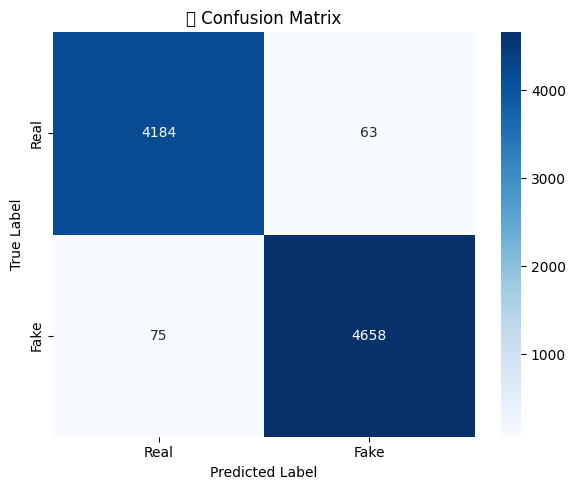

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Real", "Fake"]

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("🌀 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()

# Save (optional)
plt.savefig("D:/ML PROJECTS/Fake news detection/fake_news_confusion_matrix.png")

# Show on screen
plt.show()
